# PySpark for Big Data

Working with a large dataset through the PySpark Python library with Google Colaboratory (Colab).

Apache Spark is an open-source cluster-computing framework, able to work with large datasets quickly by performing in-memory caching and computation. Pyspark is a Python API for Spark commonly used to manipulate big data.

Cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PySpark_SQL_Cheat_Sheet_Python.pdf

In [2]:
!pip install pyspark py4j

Creating Spark DataFrame:

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim, avg, round, when
from pyspark import SparkFiles

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spark = SparkSession.builder.appName("populationdata").getOrCreate()

In [5]:
spark

## Loading the dataset and EDA

The dataset shows population estimates by age and gender:

   - PopMale: Male population for the individual age (thousands)
   - PopFemale: Female population for the individual age (thousands)
   - PopTotal: Total population for the individual age (thousands)

Dataset link: https://population.un.org/wpp/.

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = spark.read.csv(r"/content/drive/MyDrive/Colab Notebooks/WPP2019_PopulationBySingleAgeSex_1950-2019.csv", header=True)

In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
df

DataFrame[LocID: string, Location: string, VarID: string, Variant: string, Time: string, MidPeriod: string, AgeGrp: string, AgeGrpStart: string, AgeGrpSpan: string, PopMale: string, PopFemale: string, PopTotal: string]

In [11]:
df.columns

['LocID',
 'Location',
 'VarID',
 'Variant',
 'Time',
 'MidPeriod',
 'AgeGrp',
 'AgeGrpStart',
 'AgeGrpSpan',
 'PopMale',
 'PopFemale',
 'PopTotal']

In [12]:
# Number of rows
df.count()

3132010

In [13]:
df.rdd.getNumPartitions()

2

In [14]:
df.printSchema()

root
 |-- LocID: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- VarID: string (nullable = true)
 |-- Variant: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- MidPeriod: string (nullable = true)
 |-- AgeGrp: string (nullable = true)
 |-- AgeGrpStart: string (nullable = true)
 |-- AgeGrpSpan: string (nullable = true)
 |-- PopMale: string (nullable = true)
 |-- PopFemale: string (nullable = true)
 |-- PopTotal: string (nullable = true)



In [15]:
df.show()

+-----+-----------+-----+-------+----+---------+------+-----------+----------+-------+---------+--------+
|LocID|   Location|VarID|Variant|Time|MidPeriod|AgeGrp|AgeGrpStart|AgeGrpSpan|PopMale|PopFemale|PopTotal|
+-----+-----------+-----+-------+----+---------+------+-----------+----------+-------+---------+--------+
|    4|Afghanistan|    2| Medium|1950|   1950.5|     0|          0|         1|139.669|  154.913| 294.582|
|    4|Afghanistan|    2| Medium|1950|   1950.5|     1|          1|         1|131.916|  141.851| 273.767|
|    4|Afghanistan|    2| Medium|1950|   1950.5|     2|          2|         1|125.127|  130.632| 255.759|
|    4|Afghanistan|    2| Medium|1950|   1950.5|     3|          3|         1| 119.22|  121.097| 240.317|
|    4|Afghanistan|    2| Medium|1950|   1950.5|     4|          4|         1|114.112|  113.085| 227.197|
|    4|Afghanistan|    2| Medium|1950|   1950.5|     5|          5|         1|109.723|  106.436| 216.159|
|    4|Afghanistan|    2| Medium|1950|   1950.

In [16]:
df.describe()

DataFrame[summary: string, LocID: string, Location: string, VarID: string, Variant: string, Time: string, MidPeriod: string, AgeGrp: string, AgeGrpStart: string, AgeGrpSpan: string, PopMale: string, PopFemale: string, PopTotal: string]

In [17]:
df.describe().show()

+-------+------------------+-----------+-------+-------+------------------+------------------+----------------+----------------+-------------------+------------------+------------------+------------------+
|summary|             LocID|   Location|  VarID|Variant|              Time|         MidPeriod|          AgeGrp|     AgeGrpStart|         AgeGrpSpan|           PopMale|         PopFemale|          PopTotal|
+-------+------------------+-----------+-------+-------+------------------+------------------+----------------+----------------+-------------------+------------------+------------------+------------------+
|  count|           3132010|    3132010|3132010|3132010|           3132010|           3132010|         3132010|         3132010|            3132010|           3132010|           3132010|           3132010|
|   mean|1077.6884875846501|       NULL|    2.0|   NULL|            1984.5|            1985.0|            50.0|            50.0| 0.9801980198019802|2184.5058436405843|2150.7069

Removing rows we do not need.

In [18]:
df.select('VarID', 'Variant').distinct().show()

+-----+-------+
|VarID|Variant|
+-----+-------+
|    2| Medium|
+-----+-------+



In [19]:
df = df.drop('VarID', 'Variant')

In [20]:
df.show()

+-----+-----------+----+---------+------+-----------+----------+-------+---------+--------+
|LocID|   Location|Time|MidPeriod|AgeGrp|AgeGrpStart|AgeGrpSpan|PopMale|PopFemale|PopTotal|
+-----+-----------+----+---------+------+-----------+----------+-------+---------+--------+
|    4|Afghanistan|1950|   1950.5|     0|          0|         1|139.669|  154.913| 294.582|
|    4|Afghanistan|1950|   1950.5|     1|          1|         1|131.916|  141.851| 273.767|
|    4|Afghanistan|1950|   1950.5|     2|          2|         1|125.127|  130.632| 255.759|
|    4|Afghanistan|1950|   1950.5|     3|          3|         1| 119.22|  121.097| 240.317|
|    4|Afghanistan|1950|   1950.5|     4|          4|         1|114.112|  113.085| 227.197|
|    4|Afghanistan|1950|   1950.5|     5|          5|         1|109.723|  106.436| 216.159|
|    4|Afghanistan|1950|   1950.5|     6|          6|         1|105.969|   100.99| 206.959|
|    4|Afghanistan|1950|   1950.5|     7|          7|         1|102.769|   96.58

In [21]:
df.select('Location').distinct().count()

440

In [22]:
df.select('Location').distinct().show()

+--------------------+
|            Location|
+--------------------+
|       Côte d'Ivoire|
| LLDC: Latin America|
|                Chad|
|ESCAP: income groups|
|          Cabo Verde|
|       ECE: UNECE-52|
|ESCAP: ADB Develo...|
|  ESCAP: high income|
|Economic Cooperat...|
|            Kiribati|
|Europe and Northe...|
|ECLAC: The Caribbean|
|              Guyana|
|             Eritrea|
|Land-locked Count...|
|            Djibouti|
|ESCWA: Arab least...|
|ESCWA: Maghreb co...|
|                Fiji|
|      ESCAP: low HDI|
+--------------------+
only showing top 20 rows



Ordering the results by Location and using the truncate=False option to display results in full.

In [23]:
df.select('Location').distinct().orderBy('Location').show(440, truncate=False)

+-----------------------------------------------------------------------------------------+
|Location                                                                                 |
+-----------------------------------------------------------------------------------------+
|Afghanistan                                                                              |
|Africa                                                                                   |
|African Group                                                                            |
|African Union                                                                            |
|African Union: Central Africa                                                            |
|African Union: Eastern Africa                                                            |
|African Union: Northern Africa                                                           |
|African Union: Southern Africa                                                 

Checking for missing values in the dataset.

In [24]:
df.count() - df.na.drop().count()

0

## Convert types

All columns are in the form of strings. Converting some of the columns to type float.

In [25]:
floatcols = ['MidPeriod', 'PopMale', 'PopFemale', 'PopTotal']

for col_name in floatcols:
    df = df.withColumn(col_name, trim(col(col_name)).cast('float'))

Converting the Time, AgeGrp, AgeGrpStart, AgeGrpSpan columns into integers.

In [26]:
intcols = ['Time', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan']

for col_name in intcols:
    df = df.withColumn(col_name, trim(col(col_name)).cast('int'))

In [27]:
df.printSchema()

root
 |-- LocID: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Time: integer (nullable = true)
 |-- MidPeriod: float (nullable = true)
 |-- AgeGrp: integer (nullable = true)
 |-- AgeGrpStart: integer (nullable = true)
 |-- AgeGrpSpan: integer (nullable = true)
 |-- PopMale: float (nullable = true)
 |-- PopFemale: float (nullable = true)
 |-- PopTotal: float (nullable = true)



## Answering some queries about the data

Using filter to select a subset of rows satisfying a True/False condition:

What was the population breakdown by age and gender in Australia in 1970?

In [28]:
df.filter((df.Location == 'Australia') & (df.Time == 1970)).show(101)

+-----+---------+----+---------+------+-----------+----------+-------+---------+--------+
|LocID| Location|Time|MidPeriod|AgeGrp|AgeGrpStart|AgeGrpSpan|PopMale|PopFemale|PopTotal|
+-----+---------+----+---------+------+-----------+----------+-------+---------+--------+
|   36|Australia|1970|   1970.5|     0|          0|         1|126.482|   121.47| 247.952|
|   36|Australia|1970|   1970.5|     1|          1|         1|126.326|  120.997| 247.323|
|   36|Australia|1970|   1970.5|     2|          2|         1|126.439|  120.829| 247.268|
|   36|Australia|1970|   1970.5|     3|          3|         1|126.751|  120.899|  247.65|
|   36|Australia|1970|   1970.5|     4|          4|         1|127.193|   121.14| 248.333|
|   36|Australia|1970|   1970.5|     5|          5|         1|127.698|  121.488| 249.186|
|   36|Australia|1970|   1970.5|     6|          6|         1|128.196|  121.877| 250.073|
|   36|Australia|1970|   1970.5|     7|          7|         1|128.619|  122.239| 250.858|
|   36|Aus

What was the population of 45-year-old females in India in 1960?

In [32]:
df.filter((df.AgeGrp == 45)\
          & (df.Location == 'India')\
          & (df.Time == 1960))\
          .select('PopFemale')\
          .show()

+---------+
|PopFemale|
+---------+
| 1987.196|
+---------+



Using filter query to show the distinct locations starting with 'UN'.

In [33]:
df.filter(df.Location.startswith('UN'))\
  .select('Location')\
  .distinct()\
  .show(40, truncate=False)

+---------------------------------------------------------------+
|Location                                                       |
+---------------------------------------------------------------+
|UN-ECE: member countries                                       |
|UNFPA Regions                                                  |
|UNICEF Regions: South Asia                                     |
|UNFPA: East and Southern Africa (ESA)                          |
|UNFPA: West and Central Africa (WCA)                           |
|UNICEF Programme Regions: East Asia and Pacific (EAPRO)        |
|UNICEF Programme Regions: Latin America and Caribbean (LACRO)  |
|UNICEF Programme Regions: South Asia (ROSA)                    |
|UNICEF Regions: Eastern Europe and Central Asia                |
|UNITED NATIONS Regional Groups of Member States                |
|UNICEF Regions: Western Europe                                 |
|UNFPA: Asia and the Pacific (AP)                               |
|UNICEF Re

What is the population of each location in 1950 and 2019?

In [34]:
populations_in_1950 = df.filter(df.Time == 1950)\
                    .groupBy('Location')\
                    .sum('PopTotal')\
                    .withColumnRenamed('sum(PopTotal)', 'Population_1950')\
                    .withColumn('Population_1950', round('Population_1950', 3))\
                    .orderBy(col('Population_1950').desc())
populations_in_1950.show()

+--------------------+---------------+
|            Location|Population_1950|
+--------------------+---------------+
|               World|    2536431.017|
|      UNICEF REGIONS|    2536431.017|
|UNITED NATIONS Re...|    2535484.559|
|United Nations Me...|    2535484.422|
|         WHO Regions|    2522040.325|
|Countries with Ac...|    2384540.117|
|World Bank Region...|    1840638.352|
|UNICEF PROGRAMME ...|    1772861.502|
|       UNFPA Regions|    1742400.273|
|Group of Twenty (...|    1731945.275|
|Less developed re...|    1721612.096|
|Middle-income cou...|      1703596.5|
|   Group of 77 (G77)|    1618241.347|
|Less developed re...|    1526184.327|
|ESCAP: income groups|    1490837.911|
|   ESCAP: HDI groups|    1490837.911|
|United Nations Ec...|    1490837.911|
|ESCAP: WB income ...|    1490818.181|
|                Asia|    1404908.989|
|  Asia-Pacific Group|    1397562.214|
+--------------------+---------------+
only showing top 20 rows



In [35]:
populations_in_2019 = df.filter(df.Time == 2019)\
                    .groupBy('Location')\
                    .sum('PopTotal')\
                    .withColumnRenamed('sum(PopTotal)', 'Population_2019')\
                    .withColumn('Population_2019', round('Population_2019', 3))\
                    .orderBy(col('Population_2019').desc())

In [36]:
populations_in_1950.join(populations_in_2019, 'Location').orderBy('Location').show()

+--------------------+---------------+---------------+
|            Location|Population_1950|Population_2019|
+--------------------+---------------+---------------+
|         Afghanistan|       7752.117|      38041.757|
|              Africa|     227794.137|    1308064.174|
|       African Group|     227511.873|    1306320.571|
|       African Union|     227525.637|    1306903.022|
|African Union: Ce...|      24214.661|     154013.705|
|African Union: Ea...|      55336.034|     382531.218|
|African Union: No...|      43705.252|     203493.227|
|African Union: So...|      34051.198|     179956.492|
|African Union: We...|       70218.49|     386908.388|
|African, Caribbea...|     199979.667|    1150190.577|
|             Albania|       1263.164|       2880.913|
|             Algeria|        8872.25|      43053.054|
|    Andean Community|      26311.024|     111736.664|
|              Angola|       4548.021|      31825.299|
| Antigua and Barbuda|         45.515|         97.115|
|         

Which locations had the largest percentage change in population from 1950 to 2019?

In [37]:
populations_in_1950\
  .join(populations_in_2019, 'Location')\
  .orderBy('Location')\
  .withColumn('Percentage_change',
              round(100*populations_in_2019.Population_2019\
              /populations_in_1950.Population_1950, 2))\
  .orderBy(col('Percentage_change').desc())\
  .show(truncate=False)

+-----------------------------------------+---------------+---------------+-----------------+
|Location                                 |Population_1950|Population_2019|Percentage_change|
+-----------------------------------------+---------------+---------------+-----------------+
|United Arab Emirates                     |69.594         |9770.526       |14039.32         |
|Qatar                                    |25.006         |2832.071       |11325.57         |
|Western Sahara                           |13.763         |582.458        |4232.06          |
|Kuwait                                   |153.103        |4207.077       |2747.87          |
|Jordan                                   |481.319        |10101.697      |2098.75          |
|Mayotte                                  |15.138         |266.153        |1758.18          |
|Djibouti                                 |62.0           |973.557        |1570.25          |
|ESCWA: Gulf Cooperation Council countries|3941.065       |5

In 2019 which locations have the highest percentage of seniors (age 80+) relative to their total population?

In [38]:
seniors_2019 = df.filter((df.Time == 2019) & (df.AgeGrp >= 80))\
                  .groupBy('Location')\
                  .sum('PopTotal')\
                  .withColumnRenamed('sum(PopTotal)', 'Senior_Population_2019')\
                  .withColumn('Senior_Population_2019',\
                              round('Senior_Population_2019', 3))\
                  .orderBy(col('Senior_Population_2019').desc())

populations_in_2019\
  .join(seniors_2019, 'Location')\
  .withColumn('Percentage_of_Seniors',
              round(100*seniors_2019.Senior_Population_2019\
              / populations_in_2019.Population_2019, 2))\
  .orderBy(col('Percentage_of_Seniors').desc())\
  .show(truncate=False)

+------------------------------+---------------+----------------------+---------------------+
|Location                      |Population_2019|Senior_Population_2019|Percentage_of_Seniors|
+------------------------------+---------------+----------------------+---------------------+
|Japan                         |126860.298     |11018.236             |8.69                 |
|More developed: Asia          |126860.298     |11018.236             |8.69                 |
|Greece                        |10473.452      |779.928               |7.45                 |
|Italy                         |60550.092      |4465.708              |7.38                 |
|Germany                       |83517.046      |5737.398              |6.87                 |
|Portugal                      |10226.178      |671.048               |6.56                 |
|ESCAP: high HDI               |222610.632     |14503.09              |6.52                 |
|ESCAP: high income            |222836.176     |14507.027   

## Population line plot

Data visualisation with matplotlib. Population vs year for three countries plots.

In [39]:
df_3countries = df[df.Location.isin("Australia", "New Zealand", "Singapore")]\
                  .select('Location', 'MidPeriod', 'PopTotal') \
                  .groupBy('Location', 'MidPeriod')\
                  .sum('PopTotal')\
                  .withColumnRenamed('sum(PopTotal)', 'Population')\
                  .withColumn('Population', round('Population', 3))
df_3countries.show()

+---------+---------+----------+
| Location|MidPeriod|Population|
+---------+---------+----------+
|Australia|   1970.5|  12793.03|
|Australia|   2001.5| 19194.676|
|Australia|   2013.5| 23254.912|
|Australia|   2007.5| 20916.339|
|Australia|   2014.5| 23596.426|
|Australia|   1971.5|  13033.13|
|Australia|   1974.5| 13605.574|
|Australia|   1991.5| 17189.235|
|Australia|   1968.5| 12215.704|
|Australia|   2009.5| 21750.852|
|Australia|   2011.5| 22538.002|
|Australia|   1958.5|  9808.595|
|Australia|   1990.5|   16960.6|
|Australia|   1962.5|  10643.42|
|Australia|   2008.5| 21332.293|
|Australia|   1955.5|    9165.7|
|Australia|   2003.5| 19624.163|
|Australia|   1969.5| 12518.931|
|Australia|   1996.5| 18189.274|
|Australia|   2005.5| 20178.543|
+---------+---------+----------+
only showing top 20 rows



In [40]:
dataforplotting = df_3countries.toPandas()

This dataset is a manageable size, converting it to a Pandas dataframe for plotting.

In [41]:
dataforplotting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    210 non-null    object 
 1   MidPeriod   210 non-null    float32
 2   Population  210 non-null    float64
dtypes: float32(1), float64(1), object(1)
memory usage: 4.2+ KB


In [42]:
dataforplotting.pivot_table(index=['MidPeriod'], columns='Location', values='Population')

Location,Australia,New Zealand,Singapore
MidPeriod,,,
1950.5,8177.348,1908.011,1022.095
1951.5,8398.224,1947.929,1067.797
1952.5,8595.064,1992.809,1119.932
1953.5,8782.177,2040.237,1177.580
1954.5,8970.121,2088.488,1239.692
...,...,...,...
2015.5,23932.499,4614.527,5592.143
2016.5,24262.710,4659.265,5653.625
2017.5,24584.619,4702.029,5708.042


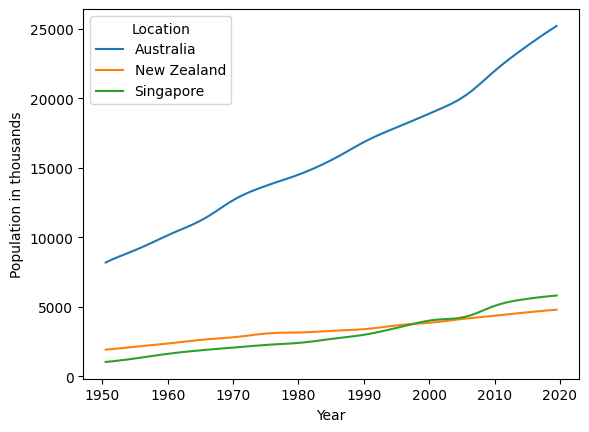

In [43]:
ax = dataforplotting.pivot_table(index=['MidPeriod'], columns='Location', values='Population').plot()
ax.set_xlabel('Year');
ax.set_ylabel('Population in thousands');

World population of children (age 0-17) along with those of the age groups 18-39 and 40+ from 1950 to 2019.

In [44]:
world_data = df[df.Location == "World"]\
                  .withColumn('AgeCategory',\
                              when(df.AgeGrpStart <= 17, '0-17')\
                              .when(df.AgeGrpStart >= 40, '40+')\
                              .otherwise('18-39'))\
                  .select('MidPeriod', 'AgeGrpStart',\
                          'AgeCategory', 'PopTotal') \
                  .groupBy('MidPeriod', 'AgeCategory')\
                  .sum('PopTotal')\
                  .withColumnRenamed('sum(PopTotal)', 'Population')\
                  .withColumn('Population', round('Population', 3))

In [45]:
agegrp_df = world_data.toPandas()

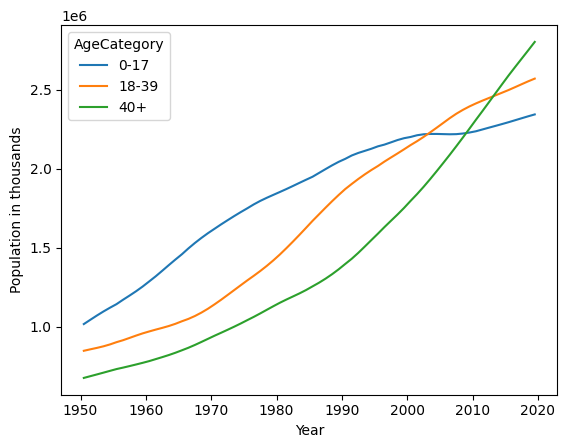

In [46]:
ax = agegrp_df.pivot_table(index=['MidPeriod'], columns='AgeCategory', values='Population').plot()
ax.set_xlabel('Year');
ax.set_ylabel('Population in thousands');

## Population Pyramid

China in the year 1980.

In [47]:
china_1980 = df.filter((df.Location == 'China (and dependencies)') & (df.Time == 1980)).toPandas()

In [48]:
china_1980

,LocID,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,1105,China (and dependencies),1980,1980.5,0,0,1,9345.832031,8896.928711,18242.761719
1,1105,China (and dependencies),1980,1980.5,1,1,1,10080.731445,9500.591797,19581.322266
2,1105,China (and dependencies),1980,1980.5,2,2,1,10769.024414,10093.152344,20862.175781
3,1105,China (and dependencies),1980,1980.5,3,3,1,11404.811523,10664.711914,22069.523438
4,1105,China (and dependencies),1980,1980.5,4,4,1,11982.184570,11205.377930,23187.562500
...,...,...,...,...,...,...,...,...,...,...
96,1105,China (and dependencies),1980,1980.5,96,96,1,1.198000,3.994000,5.192000
97,1105,China (and dependencies),1980,1980.5,97,97,1,0.894000,3.042000,3.936000
98,1105,China (and dependencies),1980,1980.5,98,98,1,0.576000,2.022000,2.598000
99,1105,China (and dependencies),1980,1980.5,99,99,1,0.240000,0.933000,1.173000


In [49]:
china_1980.describe()

,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
count,101.0,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1980.0,1980.5,50.000000,50.000000,0.980198,5200.050293,4929.667969,10129.718750
std,0.0,0.0,29.300171,29.300171,0.199007,4547.521973,4259.915039,8804.997070
min,1980.0,1980.5,0.000000,0.000000,-1.000000,0.169000,0.933000,1.144000
25%,1980.0,1980.5,25.000000,25.000000,1.000000,843.093994,1183.671997,2026.765991
50%,1980.0,1980.5,50.000000,50.000000,1.000000,4447.303223,3898.085938,8345.388672
75%,1980.0,1980.5,75.000000,75.000000,1.000000,9345.832031,8896.928711,18242.761719
max,1980.0,1980.5,100.000000,100.000000,1.000000,14015.841797,13443.602539,27459.445312


Creating age brackets in multiples of 5 - such as 0-4, 5-9, ...

In [50]:
lower = china_1980['AgeGrpStart'] - (china_1980['AgeGrpStart'] % 5)

In [51]:
agebrackets = [f'{x:02d}-{(x+4):02d}' for x in lower.values]
agebrackets[-1] = '100+'

In [52]:
agebrackets[:10]

['00-04',
 '00-04',
 '00-04',
 '00-04',
 '00-04',
 '05-09',
 '05-09',
 '05-09',
 '05-09',
 '05-09']

In [53]:
china_1980['AgeRange'] = agebrackets

Populations by age range.

In [54]:
agg_china_1980 = (china_1980.groupby(['AgeRange']).sum()[['PopMale', 'PopFemale']]/1000).reset_index()

In [55]:
rev_age = list(dict.fromkeys(agebrackets[::-1])) #reversed list of ages

In [56]:
agg_china_1980['NegPopMale'] = -agg_china_1980['PopMale']

Population pyramid plot:

<ipython-input-57-d4fb341c2b66>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(labels)
<ipython-input-57-d4fb341c2b66>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), size = 15);
<ipython-input-57-d4fb341c2b66>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_yticklabels(bar_plot.get_yticklabels(), size = 15);


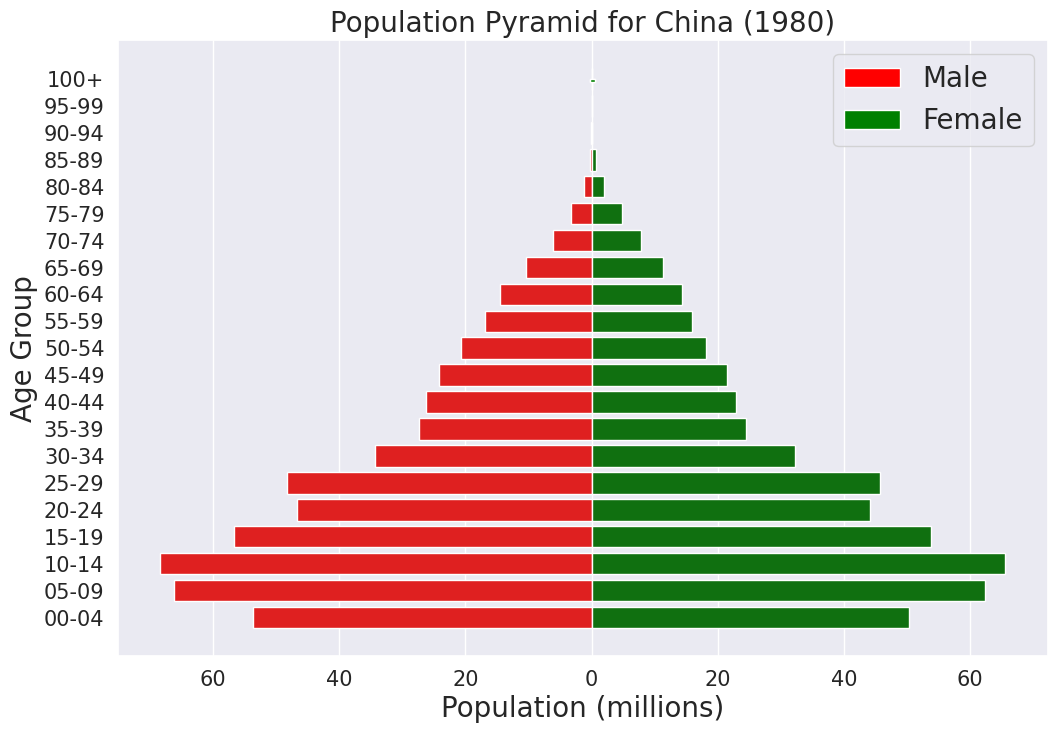

In [57]:
sns.set(rc={'figure.figsize':(12,8)})
bar_plot = sns.barplot(x='NegPopMale', y='AgeRange', data=agg_china_1980, order = rev_age, color='red')
bar_plot = sns.barplot(x='PopFemale', y='AgeRange', data=agg_china_1980, order = rev_age, color='green')

labels = ["80", "60", "40", "20", "0", "20", "40", "60", "80"]
bar_plot.set_xticklabels(labels)

h = [bar_plot.bar(x=.1, height=.1, color = c) for c in ['red', 'green']] #used to set colour of bar in legend
bar_plot.legend(handles = h, labels=['Male', 'Female'], fontsize=20)

bar_plot.axes.set_title("Population Pyramid for China (1980)", fontsize=20);
bar_plot.set_xlabel("Population (millions)", fontsize=20);
bar_plot.set_ylabel("Age Group", fontsize=20);
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), size = 15);
bar_plot.set_yticklabels(bar_plot.get_yticklabels(), size = 15);

## Prediction
Using Spark's MLlib library in a linear regression problem. Predicting the proportion of population to be of a particular age, given year.

Inputs:
- year
- age

Target variable:
- proportion of a country's population to be of that age, in that year


In [58]:
pop_by_loc_and_year = df.groupBy('Location', 'Time')\
                        .sum('PopTotal')\
                        .withColumnRenamed('sum(PopTotal)', 'Location_year_pop')

In [59]:
pop_by_loc_and_year.show()

+--------------------+----+------------------+
|            Location|Time| Location_year_pop|
+--------------------+----+------------------+
|       African Union|1999| 790628.6244071722|
|African Union: Ea...|1964| 78209.82484335266|
|             Albania|1960|1636.0909999981523|
|              Angola|1979| 8058.111999897286|
|              Angola|1987|10689.246978582349|
| Antigua and Barbuda|1995| 68.67199999373406|
| Antigua and Barbuda|2017|  95.4249999569729|
|           Argentina|2010| 40895.75102710724|
|          Azerbaijan|2012| 9264.683963924646|
|                BRIC|1981| 1991971.387032032|
|               BRICS|1994| 2523968.064731598|
|             Bahamas|1968|158.64800055802334|
|             Bahrain|2014|1336.0730002257042|
|          Bangladesh|1987| 95671.15840621479|
|            Barbados|2019| 287.0210008621216|
|Belt-Road Initiat...|1991| 579859.1757936478|
|Belt-Road Initiat...|1963| 497522.4002505541|
|Belt-Road Initiat...|2018| 1532885.483291626|
|Belt-Road In

In [60]:
trainingset = df.join(pop_by_loc_and_year, ['Location', 'Time'])\
  .withColumn('Proportion',
              df.PopTotal/pop_by_loc_and_year.Location_year_pop)\
  .select('Time', 'AgeGrpStart', 'Proportion')

Correlation between AgeGrpStart and Proportion.

In [61]:
trainingset.stat.corr("AgeGrpStart", "Proportion") #strong negative correlation

-0.906289636077237

Simple linear regression model predict Ratio from Time and AgeGrpStart.

In [62]:
from pyspark.ml.regression import LinearRegression

MLlib takes input in vector form. Hence we need to create vectors from features.

In [63]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['Time', 'AgeGrpStart'],
                                 outputCol='Features')

In [64]:
final_data_for_regression = featureassembler.transform(trainingset).select('Features', 'Proportion')
final_data_for_regression.show()

+-------------+--------------------+
|     Features|          Proportion|
+-------------+--------------------+
| [1999.0,0.0]|0.034861880698940154|
| [1999.0,1.0]|0.033504117654464094|
| [1999.0,2.0]| 0.03229754709870501|
| [1999.0,3.0]|0.031226978883906742|
| [1999.0,4.0]| 0.03036231881608717|
| [1999.0,5.0]|0.029540022684496337|
| [1999.0,6.0]| 0.02879784229235586|
| [1999.0,7.0]|0.028121706557925764|
| [1999.0,8.0]| 0.02749754439946607|
| [1999.0,9.0]|0.026922376581622418|
|[1999.0,10.0]|0.026393226339384863|
|[1999.0,11.0]| 0.02584056829977413|
|[1999.0,12.0]|0.025228194624822717|
|[1999.0,13.0]|0.024575277657470227|
|[1999.0,14.0]| 0.02394366246993583|
|[1999.0,15.0]|0.023328689992668676|
|[1999.0,16.0]|0.022669283430560058|
|[1999.0,17.0]|0.021943661756977005|
|[1999.0,18.0]| 0.02117703730693325|
|[1999.0,19.0]|0.020418749034089554|
+-------------+--------------------+
only showing top 20 rows



In [65]:
train, test = final_data_for_regression.randomSplit([0.9,0.1])

In [66]:
train

DataFrame[Features: vector, Proportion: double]

Cache these dataframes into memory:

In [67]:
train = train.cache()

In [68]:
test = test.cache()

Model training.

In [69]:
regressor = LinearRegression(featuresCol='Features', labelCol='Proportion')
regressor = regressor.fit(train)

In [70]:
regressor.coefficients

DenseVector([0.0, -0.0003])

In [71]:
regressor.intercept

0.022890668386905795

In [72]:
predicted_results = regressor.evaluate(test)

Comparing predicted proportions with actual proportions:

In [73]:
predicted_results.predictions.show()

+-------------+--------------------+--------------------+
|     Features|          Proportion|          prediction|
+-------------+--------------------+--------------------+
| [1950.0,5.0]|0.029587707250879447| 0.02166552780039167|
|[1950.0,10.0]|0.024230517338402927|0.020350789332502766|
|[1950.0,19.0]|0.019414203319659956| 0.01798426009030274|
|[1950.0,21.0]|0.018225533882470907| 0.01745836470314718|
|[1950.0,33.0]|0.012228230507308693| 0.01430299238021381|
|[1950.0,36.0]|0.011045064374422313| 0.01351414929948047|
|[1950.0,38.0]|0.010354939495473024|0.012988253912324907|
|[1950.0,48.0]|0.007345123408368...|  0.0103587769765471|
|[1950.0,49.0]|0.006999108686861546| 0.01009582928296932|
|[1950.0,57.0]|0.004890696749827147|0.007992247734347074|
|[1950.0,73.0]|0.001589276471387704|0.003785084637102...|
|[1950.0,74.0]|0.001417032458804...|0.003522136943524802|
|[1950.0,93.0]|1.209472019295989...|-0.00147386923445...|
| [1951.0,1.0]| 0.03606676769127769|0.022717364522334266|
| [1951.0,4.0]

R-squared and the mean squared error.

In [74]:
predicted_results.r2, predicted_results.meanSquaredError

(0.8214161847183006, 1.2780771138817748e-05)

## Conclusion

We can use Pyspark to make queries on a large dataset, save smaller datasets into Pandas dataframe for plotting and use MLlib for machine learning on a large dataset.